<img src =  'https://camo.githubusercontent.com/7fa5735ef58c4e7b88d448f595d089c93f9bee00/68747470733a2f2f7777772e696e736169642e636f2f77702d636f6e74656e742f75706c6f6164732f323031392f30392f6c6f676f32782e706e67' />

# __Predicting Customer Satisfaction__ - DataSet

### Presented by: *Vishweshwar Satpute*

# Table of Content

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading & Reading Data](#section3)<br>
    3.1 [Observation](#section301)<br>
4. [EDA](#section4)<br>
   - 4.1 [Pandas Profiling](#section401)<br>
       - 4.1.1 [Observation](#section40101)<br>
   - 4.2 [Cleaning Data](#section402)<br>
5. [Logistic Regression](#section5)<br>
    5.1 [Model Evaluation using Accuracy](#section501)<br>
    5.2 [Model Evaluation using confusion matrix](#section502)<br>

<a id=section1></a>
## 1. Problem Statement

Whether the customer is _**satisfied or not ?**_ based on the over-all services provided to the customer, which becomes umbrella problem.

**Factors effecting customer Satisfaction:**
- **Inflight:** 
         wifi service, entertainment, Inflight service, 
         Cleanliness, Leg room service, Food and drink, Seat comfort
         
- **other factors:**
         Flight Distance, Departure/Arrival time convenient, Ease of Online booking,
         Gate location, Online boarding, Baggage handling, Checkin service,
         Departure Delay in Minutes, Arrival Delay in Minutes.
         
- If satisfied what are the factors contributing to it ?
- If not satisfied what are the factors contributing to it ?
- We want to find a function that will predict the customer satisfaction ?

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

<a id=section3></a>
## 3. Loading & Reading Data

In [2]:
cs=  pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/predicting_customer_satisfaction.csv')
cs.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [3]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
Unnamed: 0                           103904 non-null int64
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64


In [4]:
cs.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


<a id=section301></a>
### 3.1 Observation:

- Need to check Duplicates.
- Columns: __Unnamed__, __id__, do not help in solving the problem statment so can Drop them.
- There are missing values in __Arrival Delay in Minutes__.

<a id=section4></a>
## 4. EDA

<a id=section401></a>
### 4.1 Pandas Profiling

In [7]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas_profiling

In [9]:
profile =cs.profile_report(title='output')
profile.to_file(output_file='output.html')

In [10]:
pandas_profiling.ProfileReport(cs)

<a id=section40101></a>
### 4.1.1 Observation:
- By the above generated report can understand there are __No Duplicates__
- __Rating generally are from 1 to 5:__
    - found many instance where the value of the rating to be __ZERO__, hence replacing all the zero rattings with their respective mode values.
- Departure_Delay_in_Minutes is __highly correlated with Arrival_Delay_in_Minutes	High Correlation__
- Arrival_Delay_in_Minutes is __highly correlated with Departure_Delay_in_Minutes__
- Can drop the columns which do not add value to the customer satisfaction rating
    - ***NOTE: Considering Columns to be droped:***
        Unnamed_0, Type_of_Travel, id, Gate_location, Flight_Distance,Customer_Type, Class 

<a id=section402></a>
### 4.2 Cleaning data

#### Handling Missing Values.

In [5]:
Total = cs.isnull().sum().sort_values(ascending=False)
Percent = (cs.isnull().sum()/cs.isnull().count()*100).sort_values(ascending=False)
missing_values = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
print(missing_values)

                                   Total   Percent
Arrival Delay in Minutes             310  0.298352
satisfaction                           0  0.000000
Gate location                          0  0.000000
id                                     0  0.000000
Gender                                 0  0.000000
Customer Type                          0  0.000000
Age                                    0  0.000000
Type of Travel                         0  0.000000
Class                                  0  0.000000
Flight Distance                        0  0.000000
Inflight wifi service                  0  0.000000
Departure/Arrival time convenient      0  0.000000
Ease of Online booking                 0  0.000000
Food and drink                         0  0.000000
Online boarding                        0  0.000000
Seat comfort                           0  0.000000
Inflight entertainment                 0  0.000000
On-board service                       0  0.000000
Leg room service               

#### Arrival Delay in Minutes has very less ***missing values 310 0.298352%*** which can be replaced by the ***mode***

In [6]:
cs['Arrival Delay in Minutes'].mode()

0    0.0
dtype: float64

In [7]:
cs['Arrival Delay in Minutes'] = cs['Arrival Delay in Minutes'].fillna(0)

In [8]:
cs['Arrival Delay in Minutes'].count() # filled all the missing values

103904

In [9]:
cs[cs['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


#### Replacing all the zero ratings with their respective mode values, as Ratings cannot be zero.
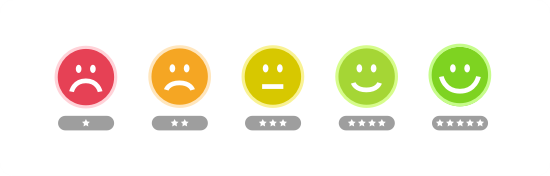
#### Note : Not Considering Departure_Delay and Arrival_Delay in_Minutes as the value '0' can be expected as  No Delay

In [10]:
mode_zero =  cs[['Checkin service', 'Cleanliness', 'Departure/Arrival time convenient', 'Ease of Online booking', 
     'Food and drink', 'Inflight entertainment', 'Inflight service', 'Inflight wifi service', 
     'Leg room service', 'On-board service', 'Online boarding', 'Seat comfort','Baggage handling']]
mode_zero

,Checkin service,Cleanliness,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Inflight entertainment,Inflight service,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort,Baggage handling
0,4,5,4,3,5,5,5,3,3,4,3,5,4
1,1,1,2,3,1,1,4,3,5,1,3,1,3
2,4,5,2,2,5,5,4,2,3,4,5,5,4
3,1,2,5,5,2,2,4,2,5,2,2,2,3
4,3,3,3,3,4,3,3,3,4,3,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,2,1,2,2,2,3,2,1,3,2,2,4
103900,5,4,4,4,2,5,5,4,5,5,4,5,5
103901,5,4,1,1,4,4,5,1,2,3,1,5,4
103902,5,1,1,1,1,1,4,1,5,4,1,1,1


In [11]:
mode_zero= mode_zero.replace(mode_zero.mode())

In [12]:
mode_zero.min()  # removed all the zero ratings.

Checkin service                      1
Cleanliness                          1
Departure/Arrival time convenient    1
Ease of Online booking               1
Food and drink                       1
Inflight entertainment               1
Inflight service                     1
Inflight wifi service                1
Leg room service                     1
On-board service                     1
Online boarding                      1
Seat comfort                         1
Baggage handling                     1
dtype: int64

#### Calculating Total and Average Rating per customer

In [13]:
cs['Rating_score']= mode_zero.sum(axis=1)

In [14]:
cs['Ave_Rating']= cs['Rating_score']/13

In [15]:
cs['Ave_Rating']= cs['Ave_Rating'].round(2)

#### Droping the columns which do not help in customer satisfication rating and the columns present in cs

In [16]:
cs.drop(['Unnamed: 0', 'id', 'Type of Travel',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'
       ],axis=1, inplace=True)

In [17]:
cs['age_Group'] = pd.cut(cs['Age'].dropna(),
                         [0,20,40,60,86],
                         labels=['0-20','21-40','41-60','61+'], include_lowest=True)              
cs.drop('Age',axis=1, inplace=True)

In [18]:
cs.head()

,Gender,Customer Type,Class,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating,age_Group
0,Male,Loyal Customer,Eco Plus,25,18.0,neutral or dissatisfied,53,4.08,0-20
1,Male,disloyal Customer,Business,1,6.0,neutral or dissatisfied,29,2.23,21-40
2,Female,Loyal Customer,Business,0,0.0,satisfied,50,3.85,21-40
3,Female,Loyal Customer,Business,11,9.0,neutral or dissatisfied,37,2.85,21-40
4,Male,Loyal Customer,Business,0,0.0,satisfied,46,3.54,61+


###  Lets See the data in visual from for better understanding and to draw the conclusions.
- To find out how many Customer are satisfied ?
- Let's see how the satisfaction percentages are for male and female customer of different type and class.

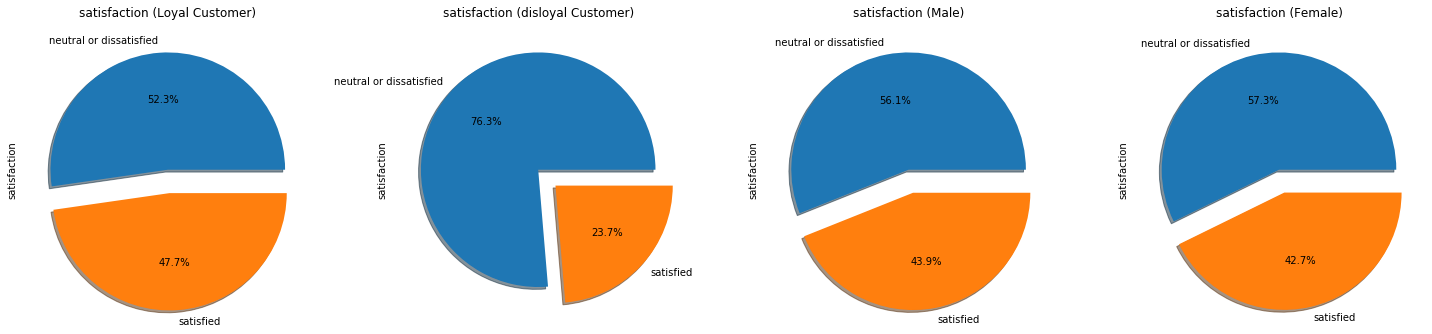

In [189]:
f,ax = plt.subplots(1,4,figsize=(20,20))
cs['satisfaction'][cs['Customer Type'] == 'Loyal Customer'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,fontsize=10)
cs['satisfaction'][cs['Customer Type'] == 'disloyal Customer'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,fontsize=10)
cs['satisfaction'][cs['Gender'] == 'Male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,fontsize=10)
cs['satisfaction'][cs['Gender'] == 'Female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,fontsize=10)

ax[0].set_title('satisfaction (Loyal Customer)')
ax[1].set_title('satisfaction (disloyal Customer)')
ax[2].set_title('satisfaction (Male)')
ax[3].set_title('satisfaction (Female)')


plt.tight_layout()

Text(0.5, 1.0, 'satisfaction (Business)')

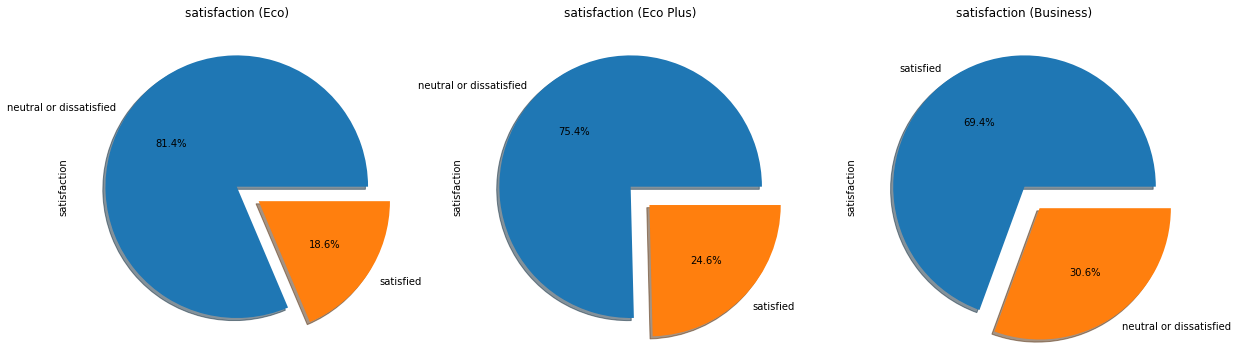

In [190]:
f,ax = plt.subplots(1,3,figsize=(20,20))
cs['satisfaction'][cs['Class'] == 'Eco'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
cs['satisfaction'][cs['Class'] == 'Eco Plus'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
cs['satisfaction'][cs['Class'] == 'Business'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('satisfaction (Eco)')
ax[1].set_title('satisfaction (Eco Plus)')
ax[2].set_title('satisfaction (Business)')

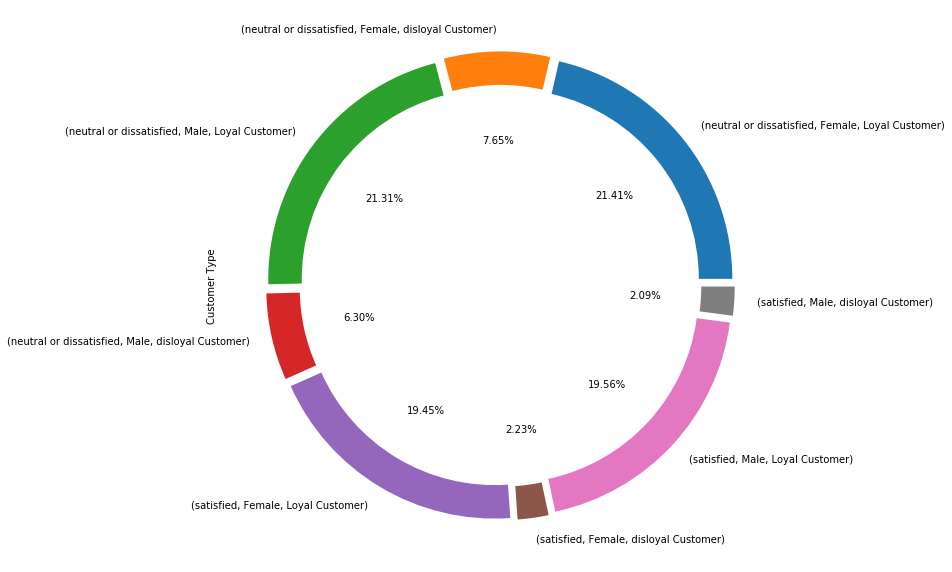

In [207]:
cs.groupby(['satisfaction','Gender'])['Customer Type'].value_counts().plot(kind='pie', autopct='%.2f%%',explode= np.ones(8)/20,wedgeprops=dict(width=0.15),figsize=(10,12))

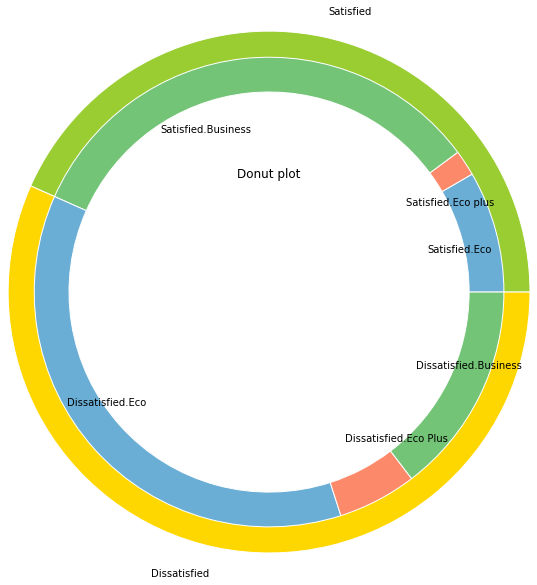

In [208]:
group_names=['Satisfied', 'Dissatisfied']
group_size=[45025,58879]
subgroup_names=['Satisfied.Eco','Satisfied.Eco plus','Satisfied.Business','Dissatisfied.Eco','Dissatisfied.Eco Plus','Dissatisfied.Business']
subgroup_size=[8701,1844,34480,38044,5650,15185]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.7, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), c(0.5), a(0.5), b(0.4), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')

plt.margins(0,0)
plt.title('Donut plot')
plt.show()

In [19]:
cs.groupby(['satisfaction'])['satisfaction'].count().to_frame()

,satisfaction
satisfaction,
neutral or dissatisfied,58879
satisfied,45025


In [20]:
cs.groupby(['satisfaction','Ave_Rating'])['satisfaction'].count().to_frame()

satisfaction
satisfaction            Ave_Rating              
neutral or dissatisfied 1.15                   4
                        1.23                   8
                        1.31                   6
                        1.38                  29
                        1.46                  71
...                                          ...
satisfied               4.69                 484
                        4.77                 274
                        4.85                 152
                        4.92                  45
                        5.00                   9

[94 rows x 1 columns]

### Calculating Total Delay.

In [21]:
cs['Total_delay'] = cs['Departure Delay in Minutes'] + cs['Arrival Delay in Minutes']

In [22]:
cs['Total_delay'].isnull().sum()

0

In [23]:
cs.head()

,Gender,Customer Type,Class,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Rating_score,Ave_Rating,age_Group,Total_delay
0,Male,Loyal Customer,Eco Plus,25,18.0,neutral or dissatisfied,53,4.08,0-20,43.0
1,Male,disloyal Customer,Business,1,6.0,neutral or dissatisfied,29,2.23,21-40,7.0
2,Female,Loyal Customer,Business,0,0.0,satisfied,50,3.85,21-40,0.0
3,Female,Loyal Customer,Business,11,9.0,neutral or dissatisfied,37,2.85,21-40,20.0
4,Male,Loyal Customer,Business,0,0.0,satisfied,46,3.54,61+,0.0


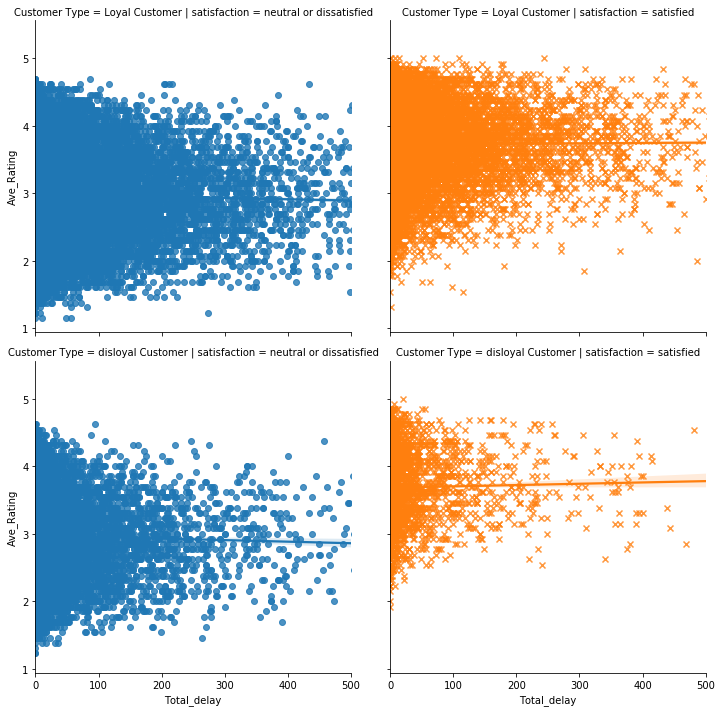

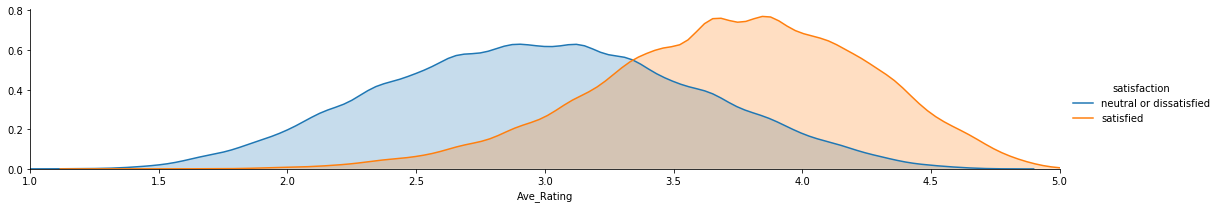

In [197]:
lm = sns.lmplot(x='Total_delay' , y='Ave_Rating' , data=cs, col= 'satisfaction',row ='Customer Type', hue='satisfaction', markers=['o','x'],sharex=True,sharey=True)
lm.set(xlim=(0,500), xticks=[0,100,200,300,400,500])

fig = sns.FacetGrid(cs,hue='satisfaction',aspect=5)
fig.map(sns.kdeplot,'Ave_Rating',shade=True)
fg= cs['Ave_Rating'].max()
fig.set(xlim=(1,fg))
fig.add_legend()

```The Facetgrid shows the relation between the Total delay and Average Rating, In neutral or dissatisfied there are no customers with 100% good (5/5)rating and the graph is slightly left-skewed though No delay customers are still not satisfied, reason behind is depend on the different rating factors.``` 

```Satisfied customer the graph is right skewed which means higher the Rating more the customers are satisfied with No delay or around 3-hours delay with good ratings is equals to customer satisfaction in majority of the population.```

#### Most of the lower rating are from the Eco, Eco Plus Customer, on the other hand, 3.8+ Ratings are with Business Class Customer. 

Text(0.5, 1.0, 'Age Group vs Satisfaction')

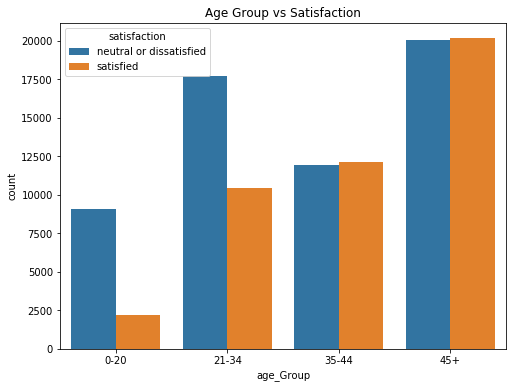

In [134]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = cs,x = 'age_Group', hue='satisfaction')
plt.title('Age Group vs Satisfaction')

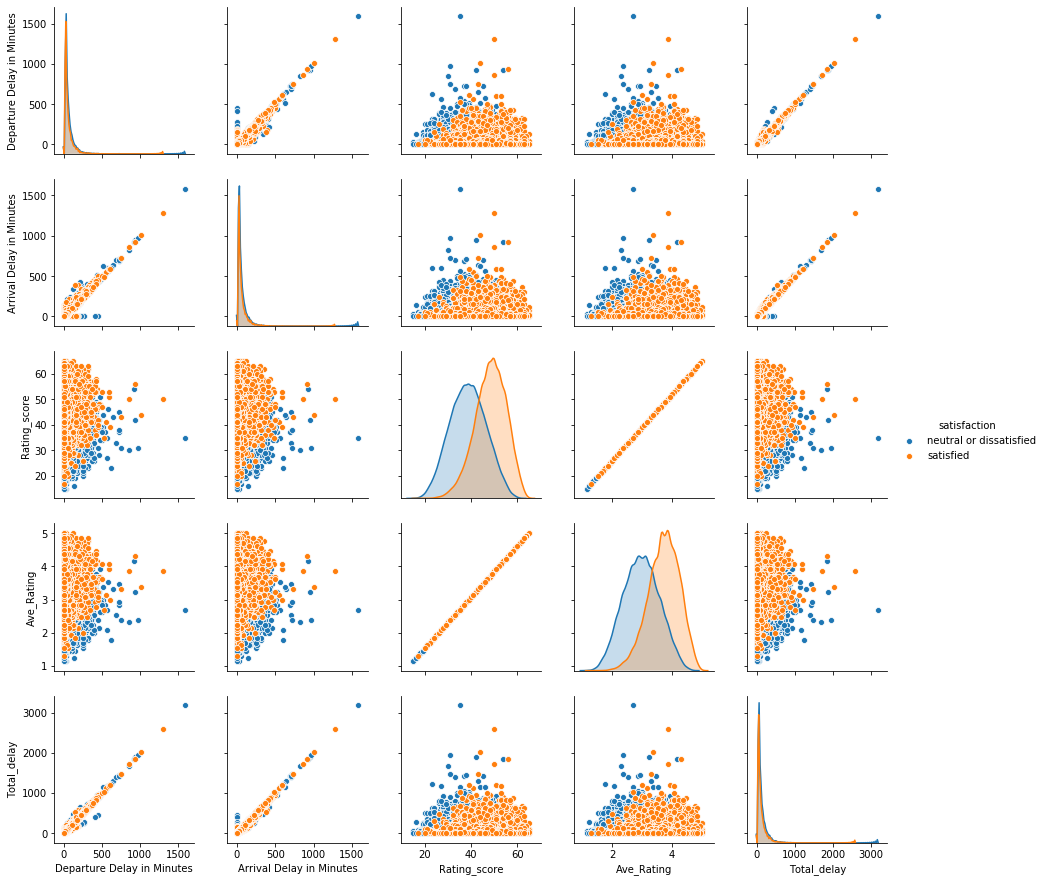

In [135]:
sns.pairplot(cs, hue='satisfaction')

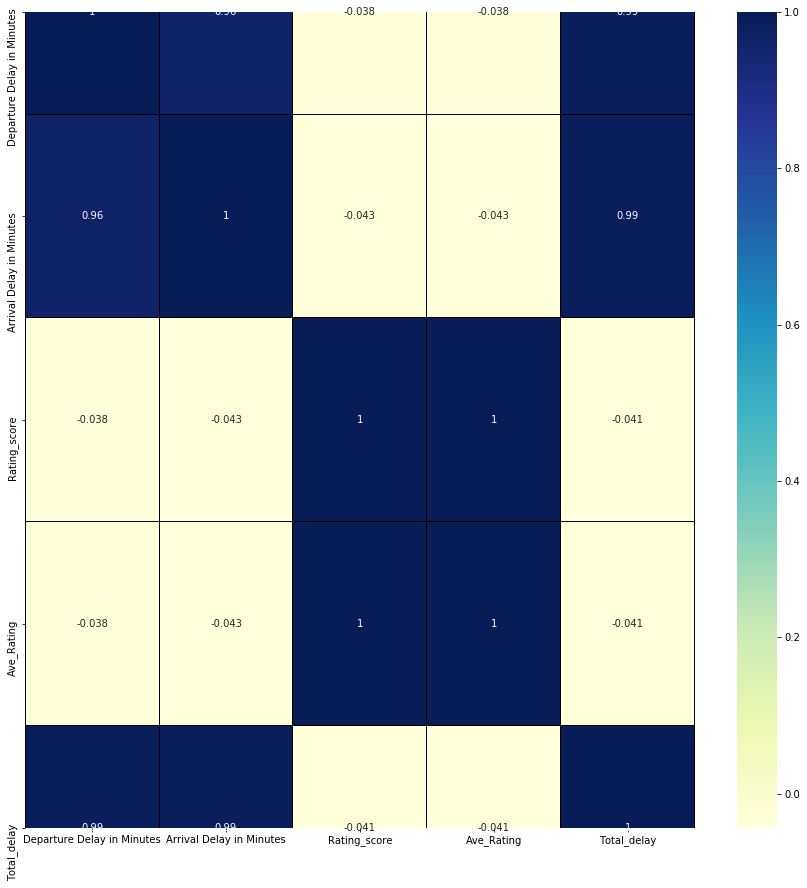

In [139]:
cor= cs.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data = cor,cmap='YlGnBu' , annot=True, lw=.01,linecolor = 'black')

### Observation : 
***Pair plot and Heat map:***
    
- looking at the above maps we can see high collinearity between, Ave_Rating and Rating_score and Departure Delay in Minutes, Arrival Delay in Minutes. 
       
- As we have **Total_Delay** we can drop **Departure Delay in Minutes, Arrival Delay in Minute**
    
- Dropping Rating_score as Average Rating makes more sense and need to drop one among them as they both are highly correlated.

In [140]:
cs.drop(['Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Rating_score'], axis=1, inplace= True)

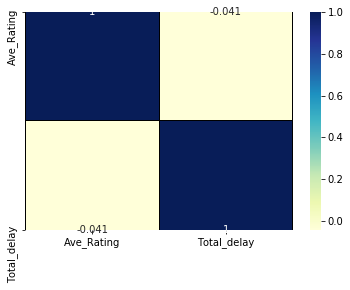

In [143]:
corr1 = cs.corr()
sns.heatmap(data=corr1, cmap='YlGnBu' , annot=True, lw=.01,linecolor = 'black')

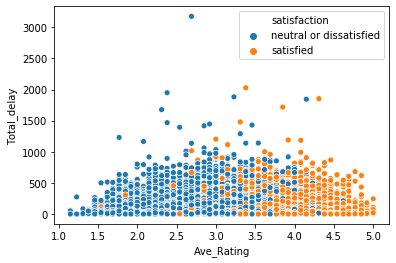

In [31]:
sns.scatterplot(data=cs, x='Ave_Rating',y='Total_delay',hue='satisfaction')

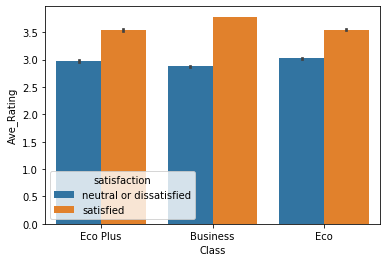

In [40]:
sns.barplot(data=cs, x='Class',y='Ave_Rating',hue='satisfaction')

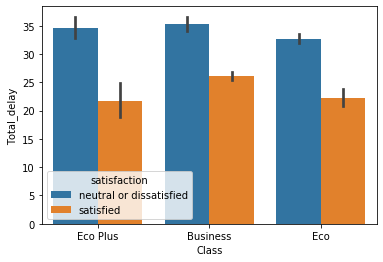

In [41]:
sns.barplot(data=cs, x='Class',y='Total_delay',hue='satisfaction')

#### Conclusion:

Hence can prove that Departure & Arrival Delay in Minutes has significant higher impact on the customer satisfaction to that off the allover rating.

### Preparing Data for ML Algorithm
- As we have lot of Categorical Values converting into numerical by dummification.

In [ ]:
#### Droping Age_Group as it has less signification.

In [145]:
cs.drop('age_Group',axis=1,inplace=True)

In [146]:
cs = pd.get_dummies(cs,drop_first=True)
cs

,Ave_Rating,Total_delay,Gender_Male,Customer Type_disloyal Customer,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,4.08,43.0,1,0,0,1,0
1,2.23,7.0,1,1,0,0,0
2,3.85,0.0,0,0,0,0,1
3,2.85,20.0,0,0,0,0,0
4,3.54,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...
103899,2.15,3.0,0,1,1,0,0
103900,4.38,0.0,1,0,0,0,1
103901,3.08,21.0,1,1,0,0,0
103902,2.08,0.0,0,1,1,0,0


<a id=section5></a>
## 5. Logistic Regression

### Preparing X and y using pandas

In [147]:
x = cs.loc[:,cs.columns != 'satisfaction_satisfied']
x.head()

,Ave_Rating,Total_delay,Gender_Male,Customer Type_disloyal Customer,Class_Eco,Class_Eco Plus
0,4.08,43.0,1,0,0,1
1,2.23,7.0,1,1,0,0
2,3.85,0.0,0,0,0,0
3,2.85,20.0,0,0,0,0
4,3.54,0.0,1,0,0,0


In [148]:
y=cs.satisfaction_satisfied
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction_satisfied, Length: 103904, dtype: uint8

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [150]:
print('80% of x_train {} and y_train is {}'.format(x_train.shape,y_train.shape))
print('20% of x test data is {} and 20% of y test data is{}'.format(x_test.shape,y_test.shape))

80% of x_train (83123, 6) and y_train is (83123,)
20% of x test data is (20781, 6) and 20% of y test data is(20781,)


In [151]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
y_pred_train = logreg.predict(x_train)  
y_pred_train.shape

(83123,)

In [167]:
y_pred_test = logreg.predict(x_test)      
y_pred_test.shape  

(20781,)

<a id=section501></a>
### 5.1 Model Evaluation using confusion matrix

In [159]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Dissatisfied','Actual Satisfied']
confusion_matrix.columns = ['Predicted Dissatisfied','Predicted Satisfied']


print(confusion_matrix)

                     Predicted Dissatisfied  Predicted Satisfied
Actual Dissatisfied                   10226                 1649
Actual Satisfied                       2040                 6866


#### This means 10226 + 6866 = __17092 correct predictions__ & 1649 + 2040 = __3689 false predictions__.

In [156]:
17092/20781

0.8224820749723305

<a id=section502></a>
### 5.2 Model Evaluation using Accuracy

Accuracy: Overall, how often is the classifier correct?

Accuracy = (TP+TN)/total

In [160]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8224820749723305


Misclassification Rate(Error Rate): Overall, how often is it wrong?
Misclassification Rate = (FP+FN)/total

In [163]:
Error_Rate = (2040+1649)/20781
Error_Rate

0.1775179250276695

Accuracy: Overall, how often is the classifier correct?
Precision: When it predicts yes, how often is it correct?
True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes?

In [168]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))

Accuracy: 0.8224820749723305
Precision: 0.8063417498532003
Recall: 0.7709409386930159


In [ ]:
Well, our binary classification model predicted the outcome with 82% accuracy which is considered as good.
Precision: Precision is about being precise, how often it is correct. 
    In our prediction case, when your Logistic Regression model predicted customers satisfaction will be 80% of the time.
Recall or Sensitivity: If there are customers satisfaction in test data and our Logistic Regression model can identify it 85% of the time.